/Users/nadabeili/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/nadabeili/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/nadabeili/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/nadabeili/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/nadabeili/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[

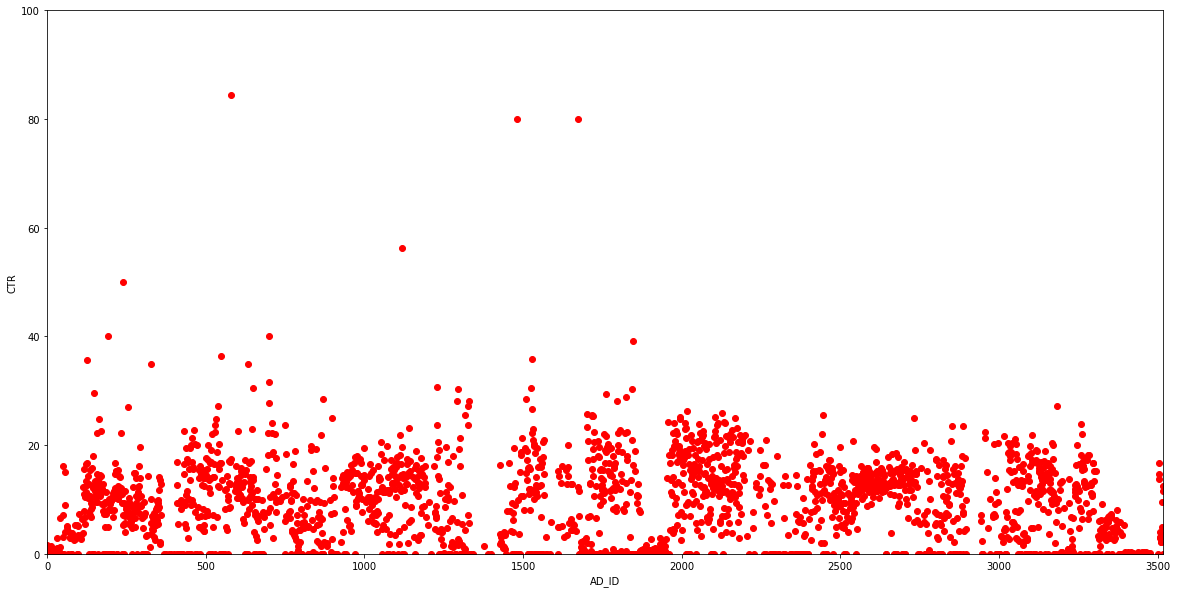

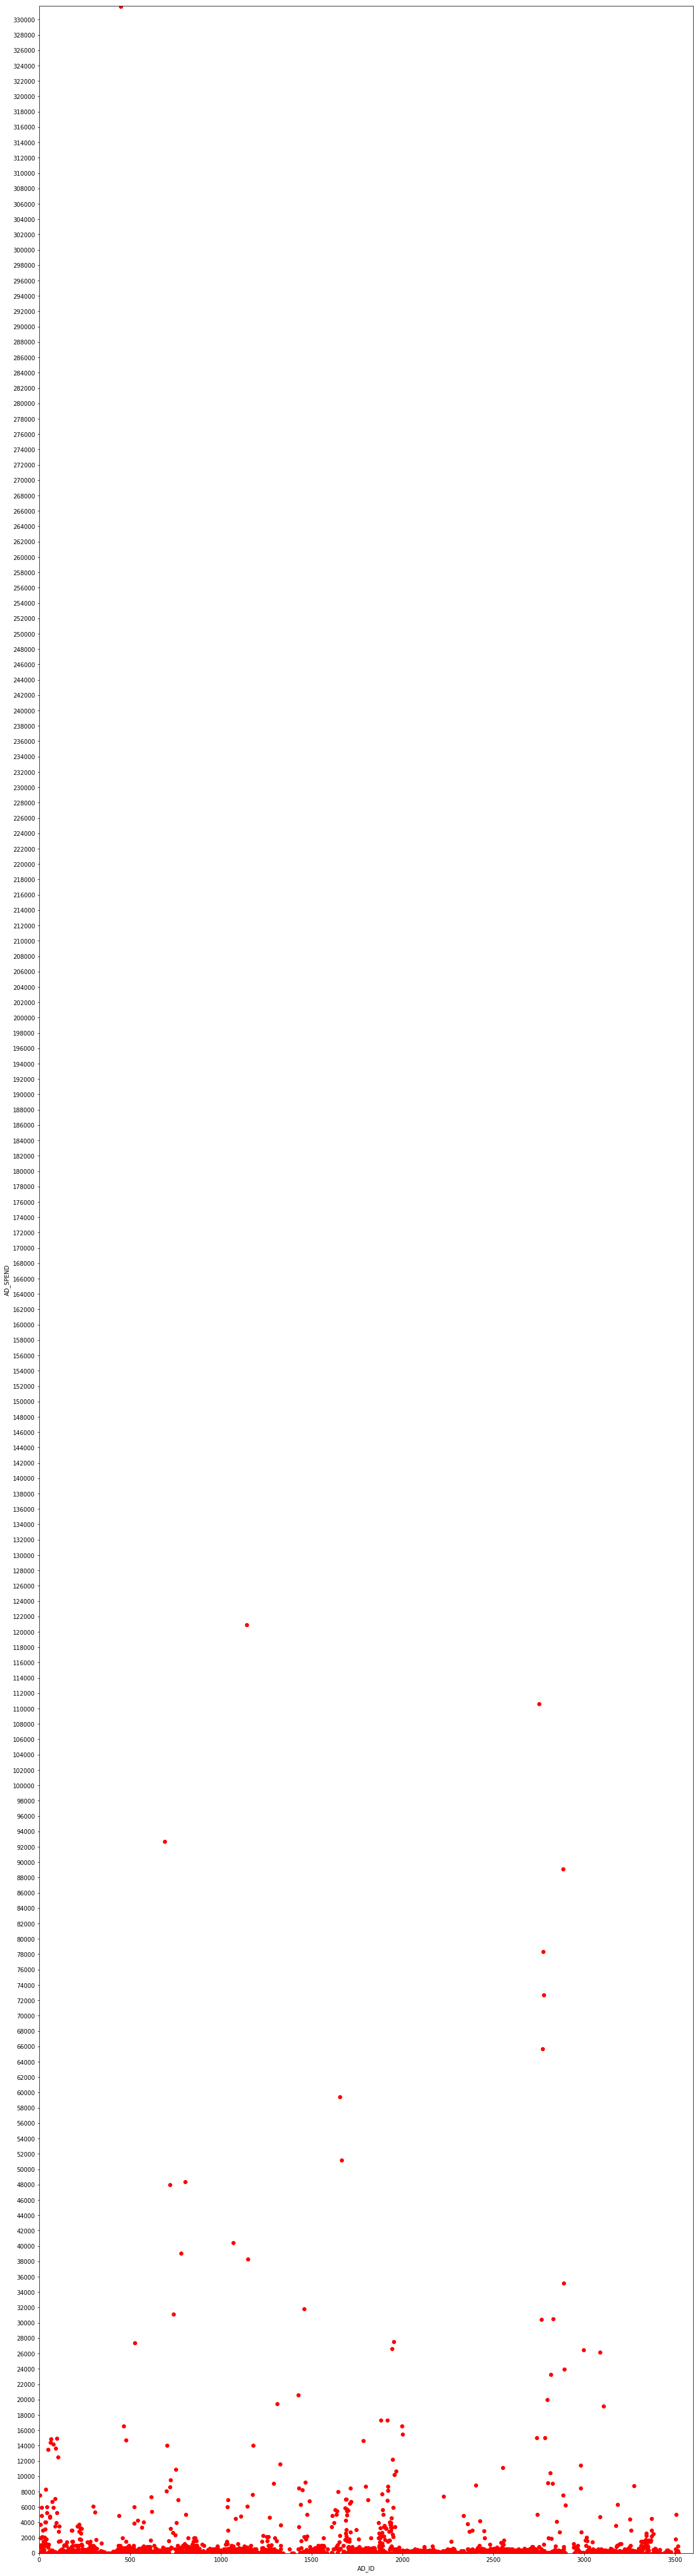

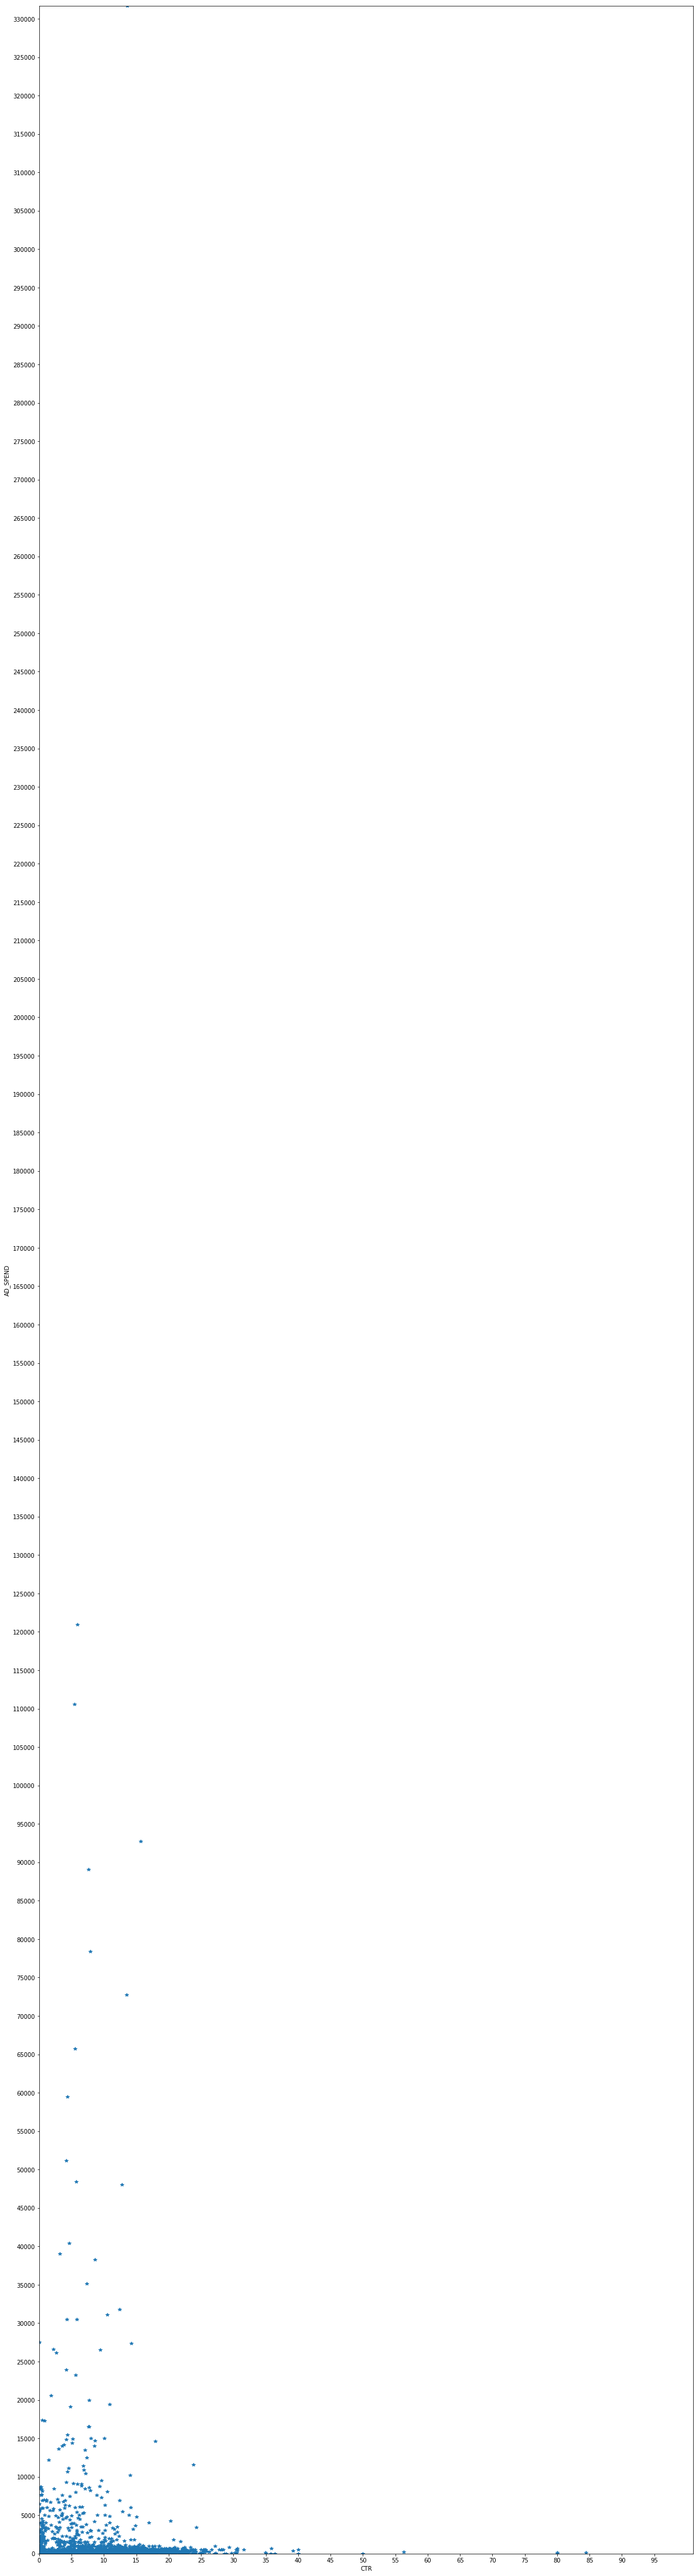

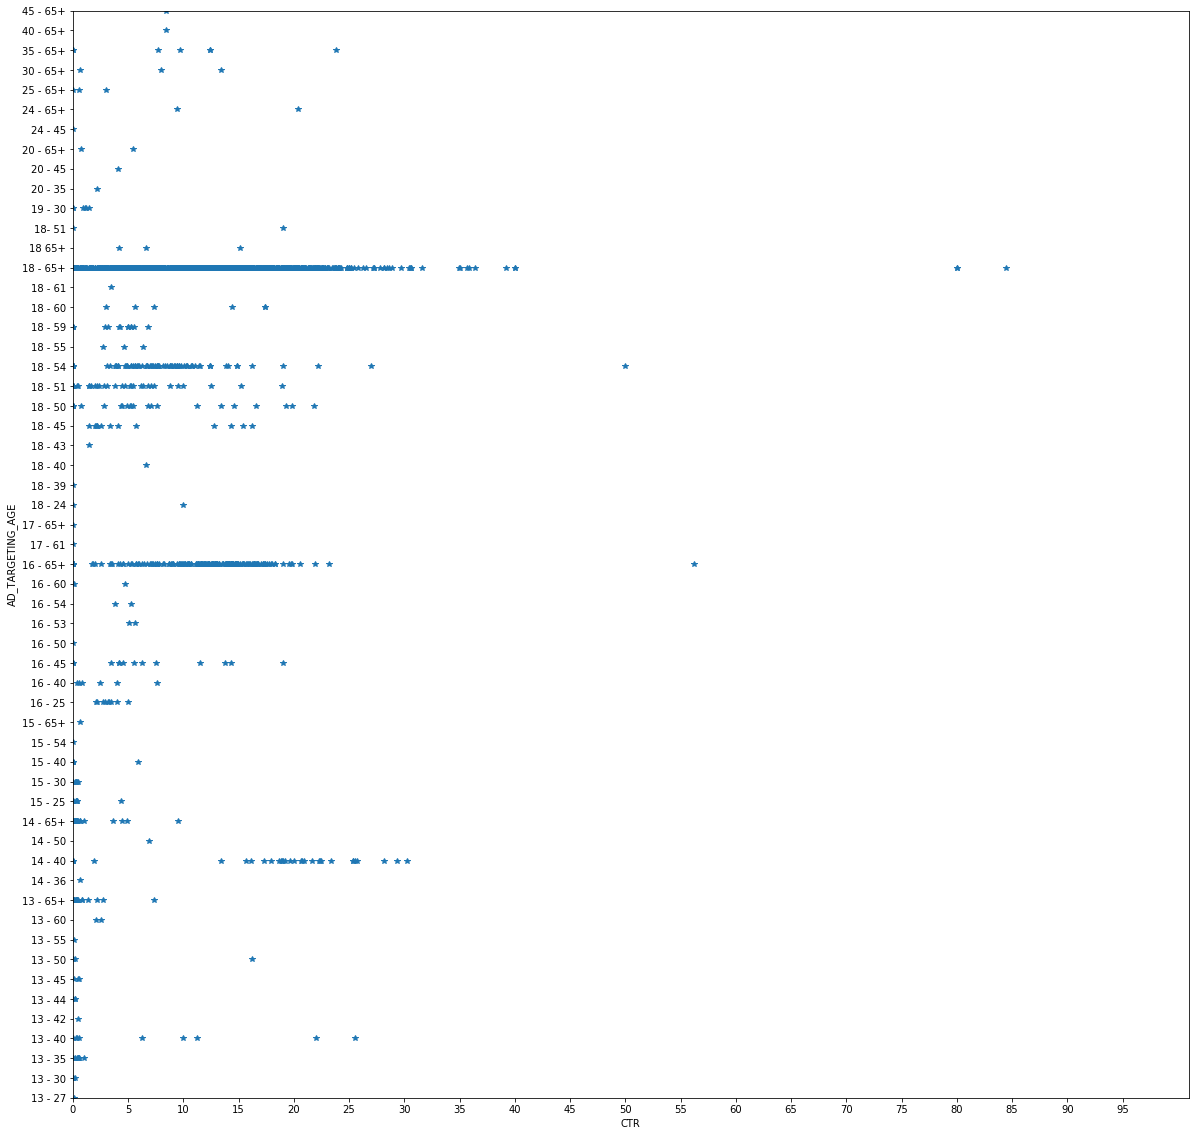

In [5]:
#import the librairies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#importing the dataset
dataset= pd.read_excel('Cleaning_data.xlsx')
data= dataset.iloc [:,:].values

#splitting the dataset into two
from sklearn.cross_validation import  train_test_split
x_Part1 ,x_Part2 = train_test_split(data,test_size=0.05,random_state=0)
df = pd.DataFrame(x_Part2)
Dataset_to_be_labelled = open("Dataset_to_be_labelled.csv", "w+")
df.columns = list(dataset.columns.values)
df.to_csv(Dataset_to_be_labelled, encoding='utf-8', index=False)

#################################
####################CTR or Click Through Rate in internet marketing = Clicks / Impressions * 100
dataset["CTR"] = ""
for index, row in dataset.iterrows():
    if row['AD_CLICKS']==0 or row['AD_IMPRESSIONS']==0:
        dataset.set_value(index,'CTR',0)
    else:
       ctr= row['AD_CLICKS']/row['AD_IMPRESSIONS']*100
       dataset.set_value(index,'CTR',ctr)

#######################################        
for index, row in dataset.iterrows(): 
    spend_list= str(row['AD_SPEND'])
    spend_list = spend_list.split()
    del(spend_list[-1])   
    dataset.set_value(index,'AD_SPEND',spend_list)
    if not spend_list :
        dataset.set_value(index,'AD_SPEND',0)
    else:
        dataset.set_value(index,'AD_SPEND',float(spend_list[0]))
        
       
       
##############################       
plt.figure(figsize=(20,10))
plt.xlabel('AD_ID')
plt.ylabel('CTR')
plt.plot(dataset['AD_ID'], dataset['CTR'], 'ro')
plt.axis([0, 3517, 0,100 ])
plt.show()

#########################3
plt.figure(figsize=(20,80))
plt.xlabel('AD_ID')
plt.ylabel('AD_SPEND')
plt.plot(dataset['AD_ID'], dataset['AD_SPEND'], 'ro')
plt.axis([0, 3600, 0,(dataset['AD_SPEND'].max()+100) ])
plt.yticks(np.arange(0,dataset['AD_SPEND'].max(),2000))
plt.show()

################################
plt.figure(figsize=(20,80))
plt.xlabel('CTR')
plt.ylabel('AD_SPEND')
plt.plot(dataset['CTR'], dataset['AD_SPEND'], '*')
plt.axis([0, 101, 0,dataset['AD_SPEND'].max() ])
plt.yticks(np.arange(0,dataset['AD_SPEND'].max(),5000))
plt.xticks(np.arange(0,100,5))
plt.show()

################################
plt.figure(figsize=(20,20))
plt.xlabel('CTR')
plt.ylabel('AD_TARGETING_AGE')
plt.plot(dataset['CTR'], dataset['AD_TARGETING_AGE'], '*')
plt.axis([0, 101, 0,dataset['AD_TARGETING_AGE'].max() ])
#plt.yticks(np.arange(0,dataset['AD_SPEND'].max(),5000))
plt.xticks(np.arange(0,100,5))

plt.show()


